In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [56]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [58]:
df = pd.read_csv("Insurance claims data.csv")
print(df.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque          max_power  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm   
1           27003      C1    M9    Diesel  200Nm@1750rpm   97.89bhp@3600rpm   
2            8794      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm   
3           73430       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
4            5410      B2    M5    Diesel  200Nm@3000rpm   88.77bhp@4000rpm   

                 engine_type  airbags is_esc is_adjustable_steering 

In [59]:
df.shape

(58592, 41)

In [60]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [61]:
df.isna().sum()/len(df)

policy_id                           0.0
subscription_length                 0.0
vehicle_age                         0.0
customer_age                        0.0
region_code                         0.0
region_density                      0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
steering_type                       0.0
turning_radius                      0.0
length                              0.0


In [62]:
df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


- The mean for claim_status is approximately 0.064, indicating that only about 6.4% of the 58,592 customers actually made a claim.
- This confirms the dataset is highly imbalanced, with over 93% of the entries belonging to the "no-claim" category.
- The average customer age is 44.8 years, with the youngest customer being 35 and the oldest being 75.
- Policyholders have a mean subscription length of 6.1 years. Interestingly, the 75th percentile is at 10.4 years, but the maximum is 14 years, suggesting a segment of very long-term customers.
- Most vehicles are relatively new, with a mean age of 1.39 years. However, there is a significant outlier with a maximum vehicle age of 20 years.
- On average, vehicles are equipped with 3.14 airbags, though some entry-level models have as few as 1 and premium models have up to 6.
- The average ncap_rating is 1.76, with a median (50%) of 2.0, indicating that a large portion of the insured vehicles have lower safety ratings.
- There is a massive variance in region_density, ranging from as low as 290 to as high as 73,430. This suggests the data covers both sparse rural areas and highly dense urban centers.
- The average vehicle length is 3,850 mm and width is 1,672 mm, which typically characterizes compact or sub-compact cars.

claim_status
0    54844
1     3748
Name: count, dtype: int64


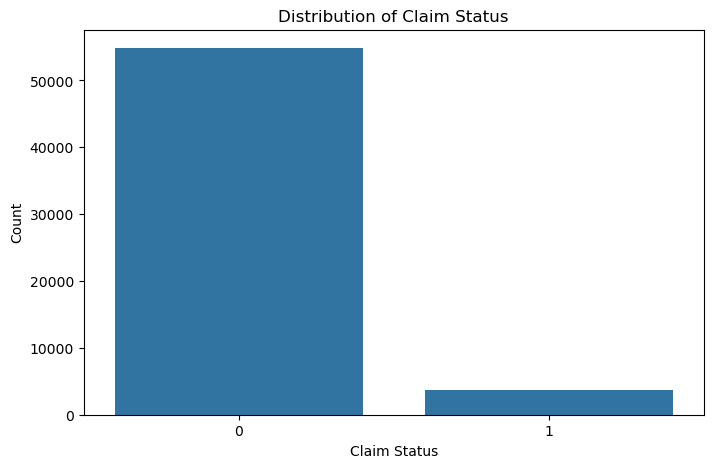

In [63]:
# plot the distribution of the target variable 'claim_status'
print(df['claim_status'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=df)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

**Numerical Feature analysis**

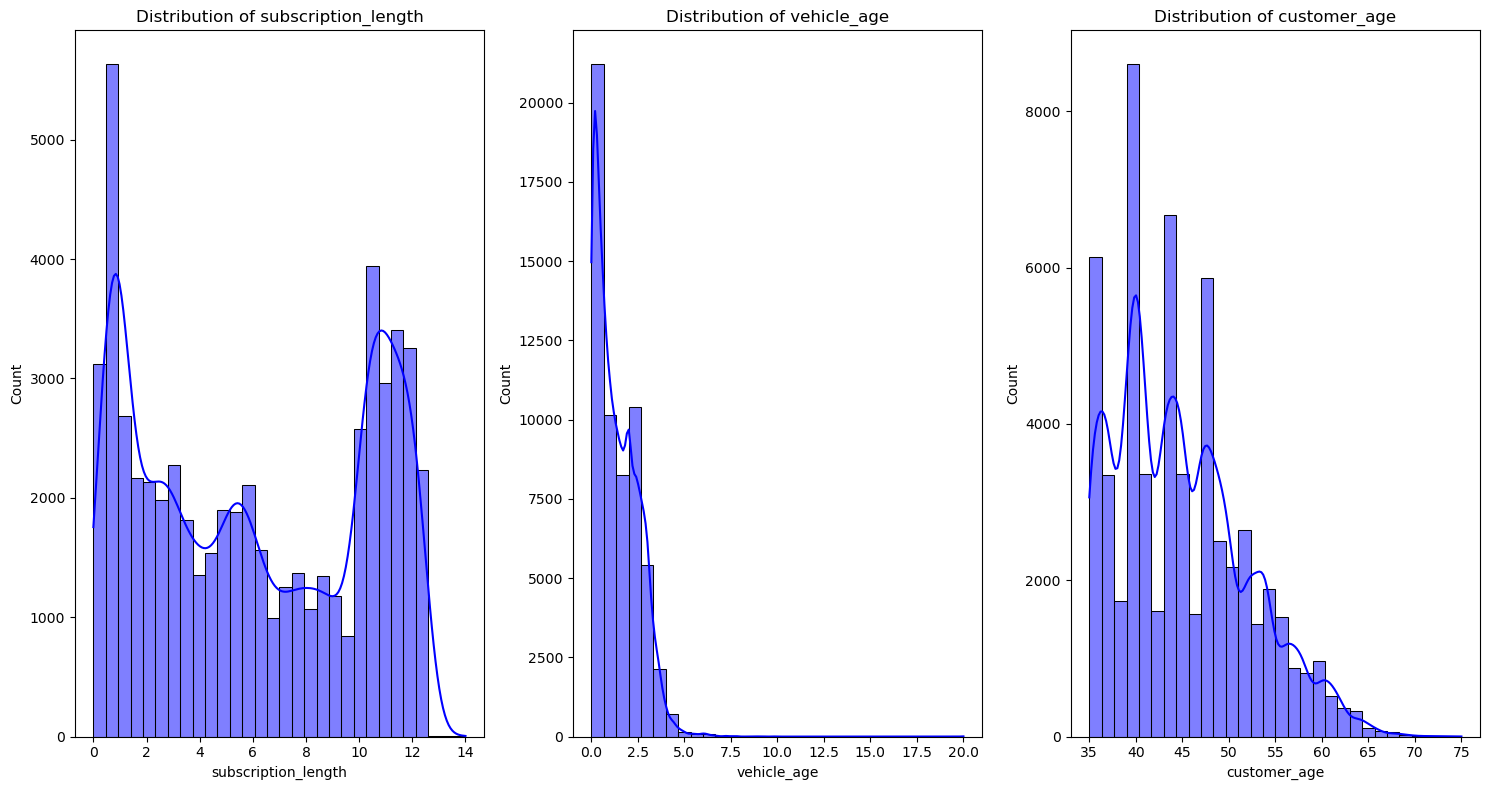

In [64]:
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=30, kde=True,color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**Categorical Feature analysis**

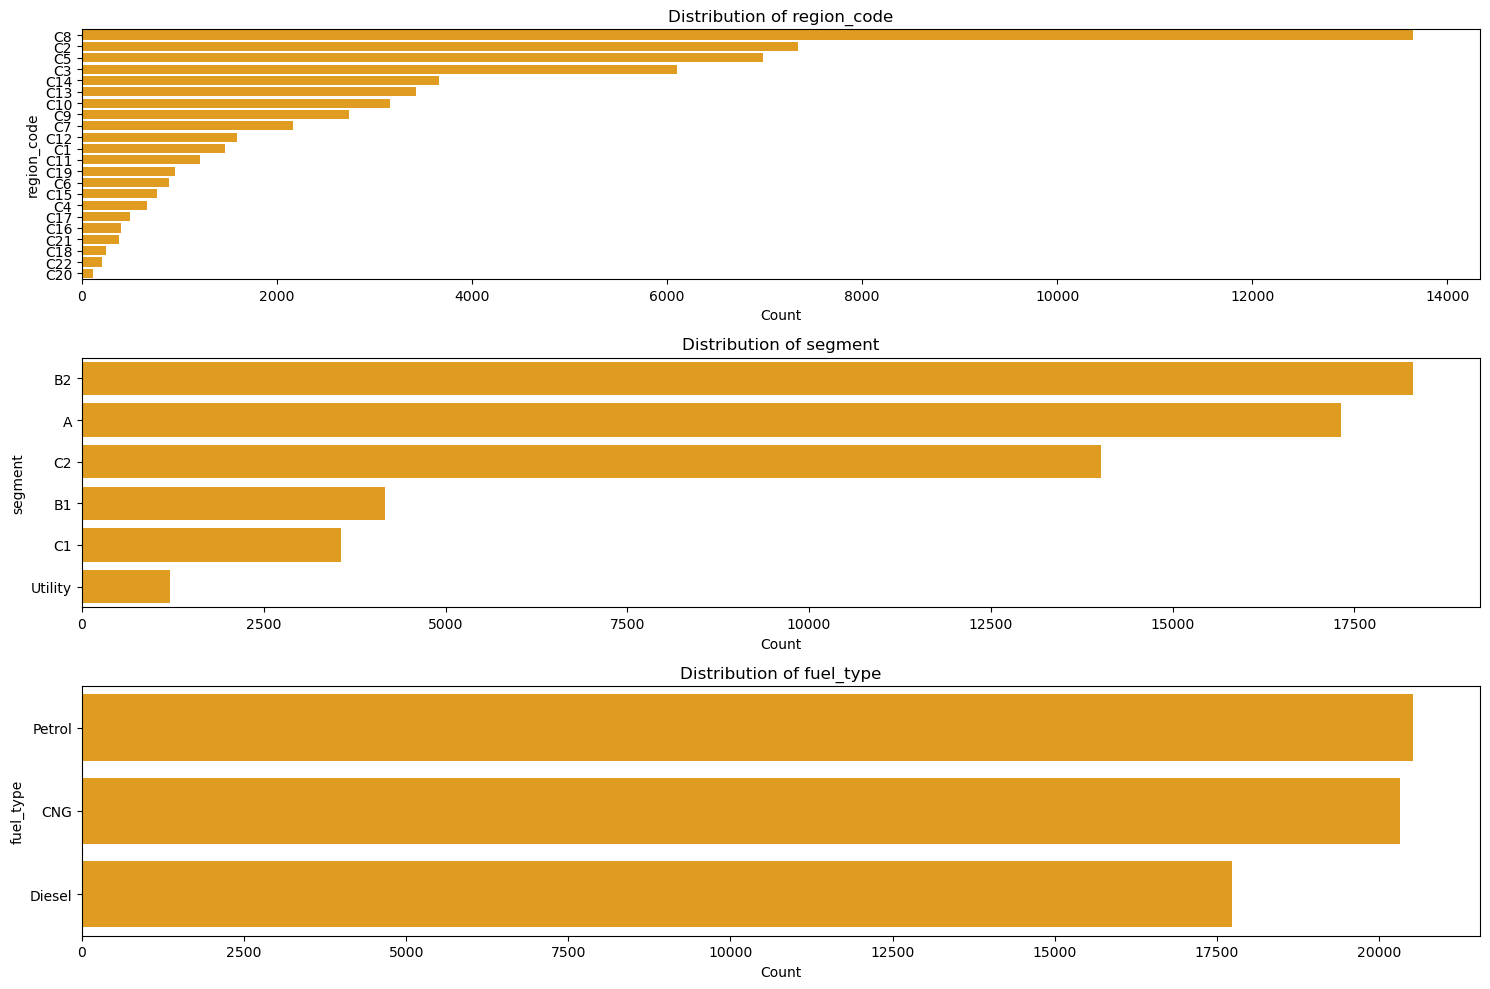

In [65]:
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=df, order = df[column].value_counts().index,color='orange')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Handling Class Imbalance

In [66]:
# separate majority and minority classes
majority = df[df.claim_status == 0]
minority = df[df.claim_status == 1]

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

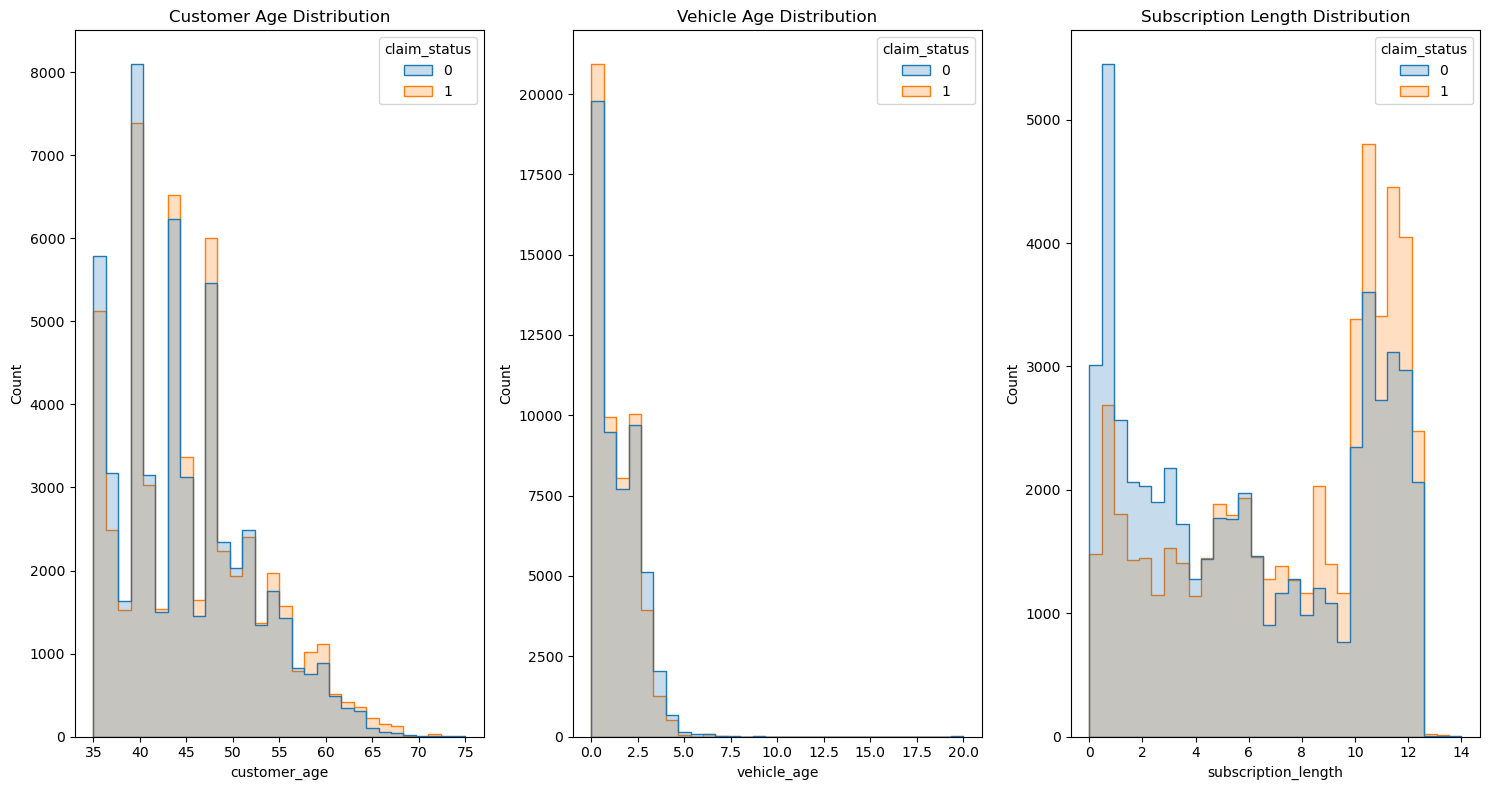

In [67]:
# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 8))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()

In [68]:
# encode categorical variables
le = LabelEncoder()
encoded_data = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

feature_importance = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10)) 

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


In [69]:
# Model Training

oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



In [70]:
original_encoded = df.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


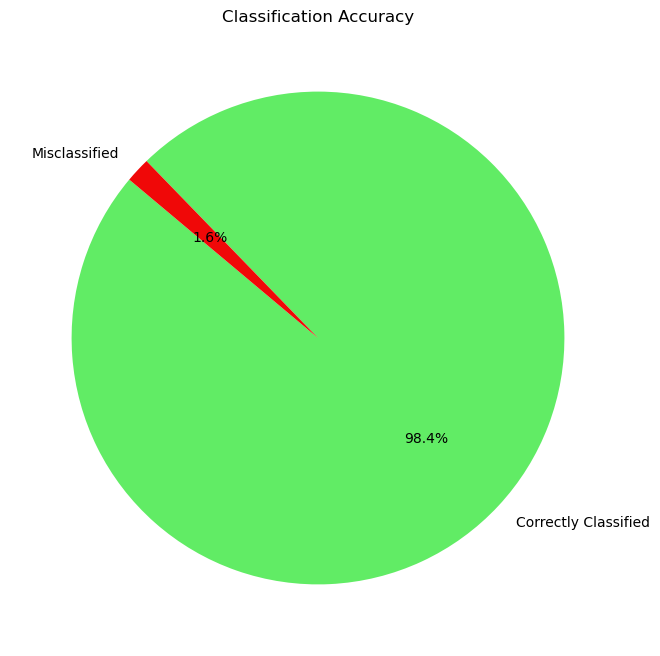

In [71]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=["#61EC65", "#F00808"])
plt.title('Classification Accuracy')
plt.show()